# Ángulos y Ortogonalidad

En espacios vectoriales generales, los conceptos de ángulo y ortogonalidad se definen utilizando un **producto interno** que generaliza la noción clásica del producto punto en $\mathbb{R}^n$. Estos conceptos son esenciales en muchas áreas de la matemática y tienen aplicaciones directas en la ciencia de datos, tales como reducción de dimensionalidad, análisis de similitud, compresión y preprocesamiento de datos.

## Explicación Matemática

### Definición del Ángulo

Para dos vectores no nulos $u$ y $v$ en un espacio vectorial con producto interno $\langle \cdot,\cdot \rangle$, el **ángulo** $\theta$ entre ellos se define mediante:

$$
\theta = \arccos\left( \frac{\langle u, v \rangle}{\|u\|\|v\|} \right)
$$

donde la **norma** (o longitud) de un vector \( u \) se define como:

$$
\| u \| = \sqrt{\langle u, u \rangle}
$$

### Ortogonalidad

Dos vectores $u$ y $v$ son **ortogonales** (o perpendiculares) si su producto interno es cero:

$$
\langle u, v \rangle = 0
$$

Esta propiedad implica que el ángulo entre $u$ y $v$ es de $\frac{\pi}{2}$ (90°). La ortogonalidad es crucial en la construcción de bases ortonormales y en procesos de descomposición, como el de Gram–Schmidt, que permite transformar un conjunto de vectores linealmente independientes en un conjunto ortogonal (o incluso ortonormal).

### Propiedades Clave

- **Generalización del producto punto:** El producto interno generaliza la noción del producto punto, lo que permite definir ángulos y longitudes en espacios de dimensión infinita o en espacios abstractos.
- **Base Ortonormal:** Una base es ortonormal si sus vectores son unitarios (norma 1) y mutuamente ortogonales. Esto simplifica muchos cálculos, ya que se tiene que para una base ${e_1, e_2, \dots, e_n}$:
  
  $$
  \langle e_i, e_j \rangle = \delta_{ij}
  $$
  
  donde $\delta_{ij}$ es el delta de Kronecker (1 si $i=j$, 0 en caso contrario).
- **Descomposición:** Técnicas como la descomposición en valores singulares (SVD) y el análisis de componentes principales (PCA) se basan en la ortogonalidad de los vectores para separar la información en componentes independientes.



## Aplicaciones en Ciencias de Datos

Los conceptos de ángulo y ortogonalidad tienen numerosas aplicaciones en ciencia de datos. A continuación se presentan algunas de las más relevantes junto con ejemplos prácticos en Python.

### 1. Reducción de Dimensionalidad (PCA y SVD)

El **Análisis de Componentes Principales (PCA)** transforma los datos a un nuevo sistema de coordenadas donde los ejes (componentes principales) son ortogonales. Cada componente captura la mayor varianza posible, y la ortogonalidad garantiza que la información se distribuye de manera no redundante.

*Ejemplo de PCA:*



Varianzas explicadas: [0.9923 0.0077]


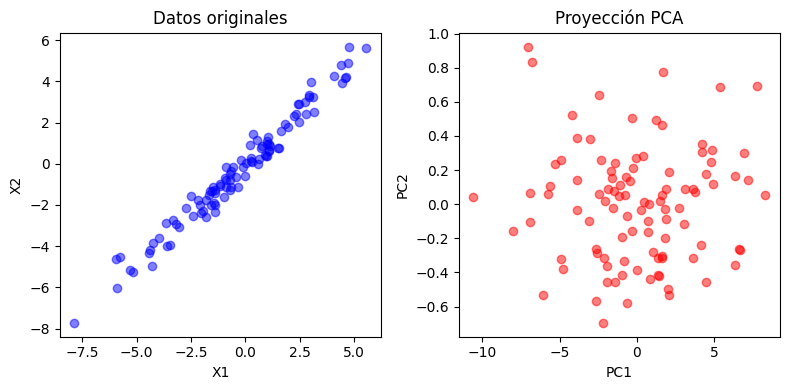

In [2]:

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Generamos datos sintéticos 2D altamente correlacionados
np.random.seed(42)
N = 100
x = np.random.normal(0, 3, size=N)
y = x + np.random.normal(0, 0.5, size=N)
X = np.column_stack((x, y))

# Aplicamos PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Varianzas explicadas:", np.round(pca.explained_variance_ratio_, 4))

# Visualizamos los datos originales y la proyección en el espacio de PCA
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c='blue', alpha=0.5)
plt.title("Datos originales")
plt.xlabel("X1")
plt.ylabel("X2")

plt.subplot(1,2,2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='red', alpha=0.5)
plt.title("Proyección PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()




En este ejemplo, PCA obtiene dos componentes ortogonales. La primera componente explica la mayor parte de la varianza y la segunda, siendo ortogonal, añade información residual.




### Compresión y Filtrado de Imágenes (SVD)

La **Descomposición en Valores Singulares (SVD)** se utiliza para aproximar matrices de datos (como imágenes) mediante componentes ortogonales. Al conservar solo los componentes principales (valores singulares más grandes), se obtiene una aproximación de rango bajo que reduce la dimensión sin perder demasiada información.

*Ejemplo de SVD en Python:*



In [1]:
import numpy as np

# Creamos una matriz de ejemplo
A = np.array([[3.0, 1.0, 1.0],
              [1.0, 3.0, 1.0],
              [1.0, 1.0, 3.0]])
U, s, Vt = np.linalg.svd(A)

print("Valores singulares:", np.round(s, 4))
print("Matriz U (columnas son vectores ortonormales):\n", np.round(U, 4))
print("Verificación de U ortogonal:\n", np.round(U.T @ U, 4))


Valores singulares: [5. 2. 2.]
Matriz U (columnas son vectores ortonormales):
 [[-0.5774 -0.      0.8165]
 [-0.5774 -0.7071 -0.4082]
 [-0.5774  0.7071 -0.4082]]
Verificación de U ortogonal:
 [[ 1. -0.  0.]
 [-0.  1. -0.]
 [ 0. -0.  1.]]



La SVD descompone la matriz $A$ en $U\Sigma V^T$ y los vectores en $U$ y $V$ son ortogonales. Esta propiedad se utiliza en compresión de imágenes y reducción de ruido.





## Conclusión

Los conceptos de ángulo y ortogonalidad en espacios vectoriales generales son herramientas fundamentales para medir la similitud, construir bases ortonormales y transformar datos. Su aplicación en ciencia de datos se refleja en técnicas de reducción de dimensionalidad (PCA, SVD), en medidas de similitud (similitud coseno) y en preprocesamientos que decorrelacionan y estabilizan el entrenamiento de modelos. Gracias a estas transformaciones, es posible extraer la información esencial de conjuntos de datos complejos y mejorar el desempeño y la interpretabilidad de los algoritmos de aprendizaje automático.

Las implementaciones en Python, mediante bibliotecas como NumPy, scikit-learn y SciPy, facilitan la aplicación de estos conceptos en escenarios reales, desde el análisis de textos hasta la compresión y filtrado de imágenes.

---

*Referencias adicionales:*

1. Strang, G. (2009). *Introduction to Linear Algebra.* Wellesley-Cambridge Press.
2. Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning.* Springer.
3. Documentación de scikit-learn: [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)
4. Documentación de NumPy: [https://numpy.org/doc/](https://numpy.org/doc/)


---